# Regressione lineare (parte 1 - max 1.5 punti)
Nella carriera di un ingegnere matematico la regressione lineare è uno strumento di straordinaria importanza, ma è veramente necessario vederla in 10 corsi diversi? E ogni volta dall'inizio?

Se non ne puoi più, salta questo assignment. 

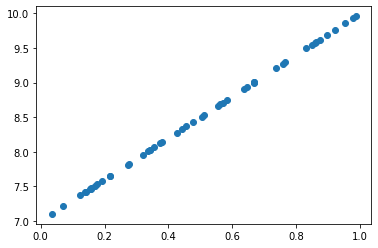

In [7]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(2020)

# Generazione dei dati 
n = 50                 # numero di punti analizzati
X = np.random.rand(n)

true_beta = [7, 3]     # [intercetta, coef. angolare]

y_true = true_beta[0] + true_beta[1] * X

plt.scatter(X, y_true)
plt.show()

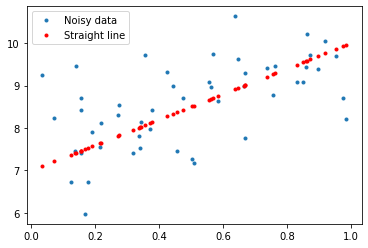

In [8]:
y = y_true + np.random.randn(n)     # aggiungo un errore gaussiano standard
plt.plot(X, y, '.', label = "Noisy data")
plt.plot(X, y_true, 'r.', label = "Straight line")
plt.legend()
plt.show()

### Regressione lineare via least squares estimation

Considera come riferimento https://en.wikipedia.org/wiki/Linear_regression#Estimation_methods

Calcola i parametri $\beta$ della regressione e plotta il risultato ottenuto

$\hat{\beta} = (X^T X)^{-1} X^T Y$

In [9]:
X1 = np.array([np.ones(n),X]).T
X1.shape

(50, 2)

In [10]:
beta = np.linalg.inv(X1.T.dot(X1)).dot(X1.T.dot(y))
beta

array([7.58758297, 2.00364768])

In [11]:
y_ls = beta[0] + beta[1] * X

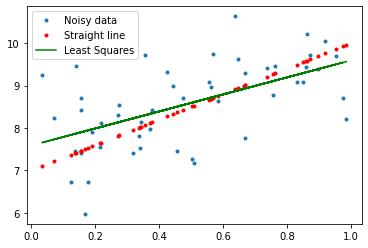

In [12]:
plt.plot(X, y, '.', label = "Noisy data")
plt.plot(X, y_true, 'r.', label = "Straight line")
plt.plot(X,y_ls, 'g-', label= "Least Squares")
plt.legend()
plt.show()

### Regressione lineare via sklearn

Trova in sklearn ciò che fa al caso nostro e plotta il risultato ottenuto

In [13]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
#dir(lin_reg)

In [14]:
#print(df.shape)
#print(X.reshape(n,1))
print(X.reshape(n,1).shape)
print(X.shape)
print(y.shape)

(50, 1)
(50,)
(50,)


In [15]:
#lr = lin_reg(normalize=True)
#linear_regressor = linear_model.LinearRegression()
Xr = X.reshape(-1,1)
lin_reg.fit(Xr, y);
#lin_reg.fit(X, y);

In [16]:
yp = lin_reg.predict(Xr)
from sklearn.metrics import r2_score
r2 = r2_score(y,yp)
rss = sum((yp-y)*(yp-y))

In [17]:
title = "RSS=%.1f $R^2$=%.3f"%(rss,r2)
Xplot = np.arange(np.min(Xr),np.max(Xr),0.1).reshape(-1,1)
yplot = lin_reg.predict(Xplot)

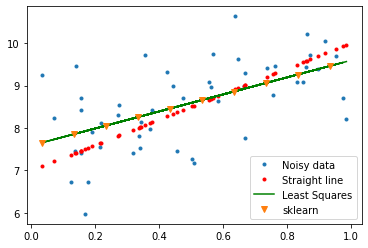

In [18]:
plt.plot(X, y, '.', label = "Noisy data")
plt.plot(X, y_true, 'r.', label = "Straight line")
plt.plot(X,y_ls, 'g-', label= "Least Squares")
plt.plot(Xplot,yplot, 'v', label= "sklearn")
plt.legend()
plt.show()

In [19]:
beta_sklearn = lin_reg.get_params()
print(beta)
print(beta_sklearn)

[7.58758297 2.00364768]
{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}


### Regressione con batch gradient descent

Implementa la regressione tramite batch gradient descent e plotta l'evoluzione della retta stimata con diversi iperparametri

In [20]:
def minibatch_gradient_descent(X,y,theta,learning_rate=0.01,iterations=10,batch_size =20):
    '''
    X    = Matrix of X without added bias units
    y    = Vector of Y
    theta=Vector of thetas np.random.randn(j,1)
    learning_rate 
    iterations = no of iterations
    
    Returns the final theta vector and array of cost history over no of iterations
    '''
    m = len(y)
    cost_history = np.zeros(iterations)
    n_batches = int(m/batch_size)
    
    for it in range(iterations):
        cost =0.0
        indices = np.random.permutation(m)
        X = X[indices]
        y = y[indices]
        for i in range(0,m,batch_size):
            X_i = X[i:i+batch_size]
            y_i = y[i:i+batch_size]
            
            X_i = np.c_[np.ones(len(X_i)),X_i]
           
            prediction = np.dot(X_i,theta)

            theta = theta -(1/m)*learning_rate*( X_i.T.dot((prediction - y_i)))
            cost += cal_cost(theta,X_i,y_i)
        cost_history[it]  = cost
        
    return theta, cost_history

In [21]:
lr =0.1
n_iter = 200

theta = np.random.randn(2,1)


theta,cost_history = minibatch_gradient_descent(X,y,theta,lr,n_iter)


print('Theta0:          {:0.3f},\nTheta1:          {:0.3f}'.format(theta[0][0],theta[1][0]))
print('Final cost/MSE:  {:0.3f}'.format(cost_history[-1]))

NameError: ignored

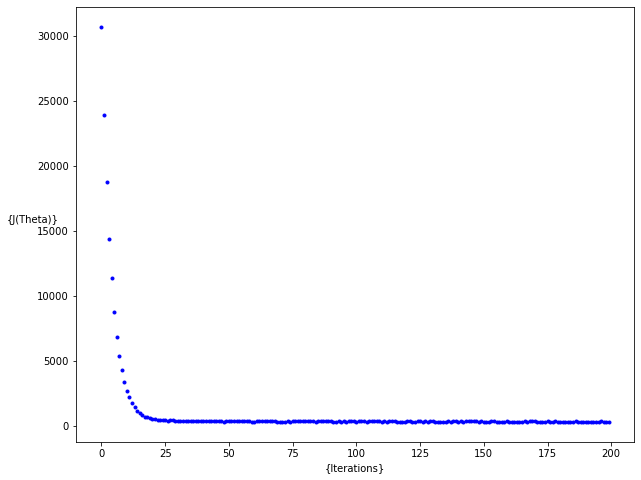

In [ ]:
fig,ax = plt.subplots(figsize=(10,8))

ax.set_ylabel('{J(Theta)}',rotation=0)
ax.set_xlabel('{Iterations}')
theta = np.random.randn(2,1)

_=ax.plot(range(n_iter),cost_history,'b.') #from the plot I can see that 200 is enough

In [ ]:
beta_BGD = np.array([7.356,2.446])
beta_BGD.shape

(2,)

In [ ]:
yp = beta_BGD[0]+beta_BGD[1]*X
from sklearn.metrics import r2_score
r2 = r2_score(y,yp)
rss = sum((yp-y)*(yp-y))

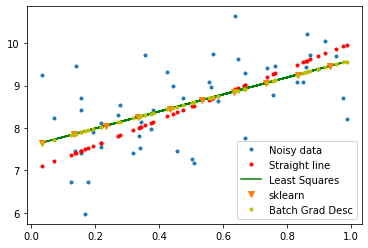

In [ ]:
plt.plot(X, y, '.', label = "Noisy data")
plt.plot(X, y_true, 'r.', label = "Straight line")
plt.plot(X,y_ls, 'g-', label= "Least Squares")
plt.plot(Xplot,yplot, 'v', label= "sklearn")
plt.plot(X,yp, 'y.', label= "Batch Grad Desc")
plt.legend()
plt.show()

### Regressione con stochastic gradient descent

Implementa la regressione tramite stochastic gradient descent e plotta l'evoluzione della retta stimata con diversi iperparametri

In [22]:
def stocashtic_gradient_descent(X,y,theta,learning_rate=0.01,iterations=10):
    '''
    X    = Matrix of X with added bias units
    y    = Vector of Y
    theta=Vector of thetas np.random.randn(j,1)
    learning_rate 
    iterations = no of iterations
    
    Returns the final theta vector and array of cost history over no of iterations
    '''
    m = len(y)
    cost_history = np.zeros(iterations)
    
    
    for it in range(iterations):
        cost =0.0
        for i in range(m):
            rand_ind = np.random.randint(0,m)
            X_i = X[rand_ind,:].reshape(1,X.shape[1])
            y_i = y[rand_ind].reshape(1,1)
            prediction = np.dot(X_i,theta)

            theta = theta -(1/m)*learning_rate*( X_i.T.dot((prediction - y_i)))
            cost += cal_cost(theta,X_i,y_i)
        cost_history[it]  = cost
        
    return theta, cost_history

In [23]:
lr =0.5
n_iter = 50

theta = np.random.randn(2,1)

X_b = np.c_[np.ones((len(X),1)),X]
theta,cost_history = stocashtic_gradient_descent(X_b,y,theta,lr,n_iter)


print('Theta0:          {:0.3f},\nTheta1:          {:0.3f}'.format(theta[0][0],theta[1][0]))
print('Final cost/MSE:  {:0.3f}'.format(cost_history[-1]))

NameError: ignored

In [24]:
beta_SGD = np.array([7.355,2.501])
beta_SGD.shape

(2,)

In [25]:
ypSGD = beta_SGD[0]+beta_SGD[1]*X
from sklearn.metrics import r2_score
r2 = r2_score(y,ypSGD)
rss = sum((ypSGD-y)*(ypSGD-y))

NameError: ignored

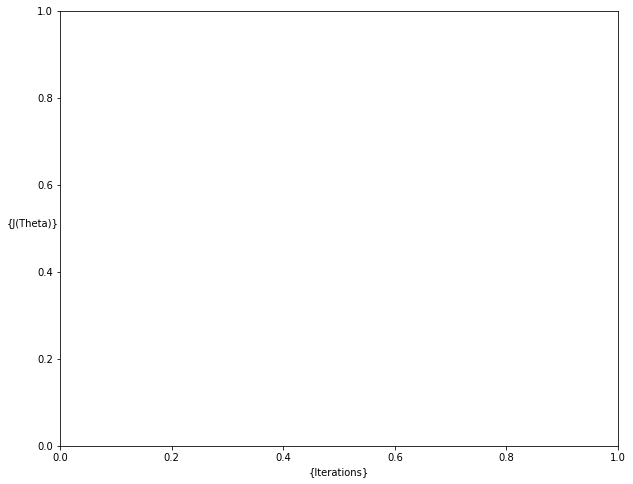

In [26]:
fig,ax = plt.subplots(figsize=(10,8))

ax.set_ylabel('{J(Theta)}',rotation=0)
ax.set_xlabel('{Iterations}')
theta = np.random.randn(2,1)

_=ax.plot(range(n_iter),cost_history,'b.') #from the plot I can see that 50 is enough

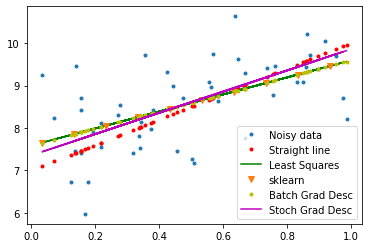

In [ ]:
plt.plot(X, y, '.', label = "Noisy data")
plt.plot(X, y_true, 'r.', label = "Straight line")
plt.plot(X,y_ls, 'g-', label= "Least Squares")
plt.plot(Xplot,yplot, 'v', label= "sklearn")
plt.plot(X,yp, 'y.', label= "Batch Grad Desc")
plt.plot(X,ypSGD, 'm-', label= "Stoch Grad Desc")
plt.legend()
plt.show() #from the plot I can see that Least Suare, sklearn and batch gradient descent methods have very similar outputs
#the SGD method istead is a little different (and closer to the original straight line)

# Regressione lineare (parte 2 - max 1.5 punti)


Implementa una classe MyLinearRegression che abbia i seguenti metodi:
    - fit(X,y)
    - predict(X_test)
    - show_info
    
Un primissimo scheletro è proposto qui, ma è consigliabile (per maggiore chiarezza) aggiungere ulteriori metodi all'interno della classe.

In [3]:
import time

In [2]:
class MyLinearRegression:

    def fit(self, X, y):
        n = X.shape[0]
        k = X.shape[1]
        X1 = np.c_[np.ones((n,1)),X]
        beta = np.linalg.inv(X1.T.dot(X1)).dot(X1.T.dot(y))
        self.yp = X1.dot(beta)
        self.rsq = r2_score(y,self.yp)
        self.loss = sum((self.yp-y)*(self.yp-y))
        self.adjrsq = 1 - (((1-self.rsq)*(n-1))/(n-k-1))
        pass
    
    def predict(self, X_test):
        n_new = X_test.shape[0]
        X1_new = np.c_[np.ones((n_new,1)),X_test]
        y_new = X1_new.dot(beta)
        return y_new
        pass
    

    
    def show_info(self):
        start_time = time.time()
        print("Loss = ", self.loss)
        print("R squared = ", self.rsq, "\nAdjusted R squared = ", self.adjrsq)
        self.time= time.time() - start_time
        print("Elapsed Time = ", self.time)


In [1]:
from sklearn import datasets
diabetes = datasets.load_diabetes()
X = diabetes['data']
y = diabetes['target']

In [6]:
model = MyLinearRegression()
model.fit(X, y)
model.predict(X_test)
model.show_info()

IndexError: ignored